In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
path = 'adult.data.csv'
adult_data = pd.read_csv(path)
adult_data.head().T

,0,1,2,3,4
39,50,38,53,28,37
State-gov,Self-emp-not-inc,Private,Private,Private,Private
77516,83311,215646,234721,338409,284582
Bachelors,Bachelors,HS-grad,11th,Bachelors,Masters
13,13,9,7,13,14
Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse
Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty,Exec-managerial
Not-in-family,Husband,Not-in-family,Husband,Wife,Wife
White,White,White,Black,Black,White
Male,Male,Male,Male,Female,Female


In [8]:
data_header = ['Age','Workclass','fnlwgt','Education','Education-num','Marital_Status','Occupation','Relationship','Race','Sex','Capital-gain','Capital-loss','hrs_per_week','Native-Country','Earning_potential']
adult_data = pd.read_csv(path, names = data_header)
adult_data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,Earning_potential
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                32561 non-null  int64 
 1   Workclass          32561 non-null  object
 2   fnlwgt             32561 non-null  int64 
 3   Education          32561 non-null  object
 4   Education-num      32561 non-null  int64 
 5   Marital_Status     32561 non-null  object
 6   Occupation         32561 non-null  object
 7   Relationship       32561 non-null  object
 8   Race               32561 non-null  object
 9   Sex                32561 non-null  object
 10  Capital-gain       32561 non-null  int64 
 11  Capital-loss       32561 non-null  int64 
 12  hrs_per_week       32561 non-null  int64 
 13  Native-Country     32561 non-null  object
 14  Earning_potential  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
adult_data.sample(50)

,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,Earning_potential
15125,41,Private,274363,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,7298,0,42,United-States,>50K
11862,23,Private,172047,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K
13593,28,Private,130856,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
9394,18,Private,182042,11th,7,Never-married,Other-service,Own-child,White,Female,0,0,19,United-States,<=50K
28777,18,Self-emp-not-inc,42857,Some-college,10,Never-married,Craft-repair,Not-in-family,White,Female,0,0,35,United-States,<=50K
27825,44,Private,35910,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1902,56,United-States,>50K
10970,21,Private,170800,HS-grad,9,Never-married,Sales,Own-child,White,Female,0,0,30,United-States,<=50K
136,43,Self-emp-not-inc,56920,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,<=50K
23491,48,Private,187505,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,>50K
3041,27,State-gov,28848,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,9,United-States,<=50K


In [11]:
adult_data = adult_data.replace(to_replace = '%?%', value = np.nan)
adult_data.isna().sum()

Age                  0
Workclass            0
fnlwgt               0
Education            0
Education-num        0
Marital_Status       0
Occupation           0
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
hrs_per_week         0
Native-Country       0
Earning_potential    0
dtype: int64

In [12]:
all_columns = list(adult_data.columns)
print('all_columns:\n {}'.format(all_columns))

categorical_columns = list(adult_data.select_dtypes(include=['object']).columns)
print('Categorical columns:\n {}'.format(categorical_columns))

numerical_columns = list(adult_data.select_dtypes(include=['int64', 'float64']).columns)
print('Numerical columns:\n {}'.format(numerical_columns))

all_columns:
 ['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'hrs_per_week', 'Native-Country', 'Earning_potential']
Categorical columns:
 ['Workclass', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native-Country', 'Earning_potential']
Numerical columns:
 ['Age', 'fnlwgt', 'Education-num', 'Capital-gain', 'Capital-loss', 'hrs_per_week']


In [14]:
adult_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
Education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
Capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
Capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hrs_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [15]:
len(categorical_columns)

9

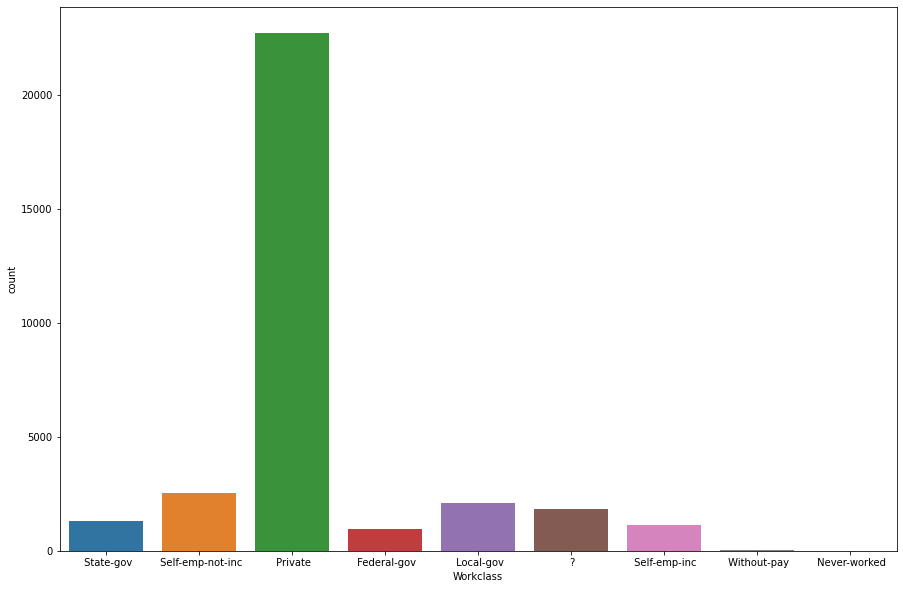

In [16]:
plt.figure(figsize = (15,10))
sns.countplot(adult_data['Workclass'])
plt.show()

In [17]:
adult_data['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [18]:
adult_data.groupby(['Workclass', 'Earning_potential']).size()

Workclass          Earning_potential
 ?                  <=50K                1645
                    >50K                  191
 Federal-gov        <=50K                 589
                    >50K                  371
 Local-gov          <=50K                1476
                    >50K                  617
 Never-worked       <=50K                   7
 Private            <=50K               17733
                    >50K                 4963
 Self-emp-inc       <=50K                 494
                    >50K                  622
 Self-emp-not-inc   <=50K                1817
                    >50K                  724
 State-gov          <=50K                 945
                    >50K                  353
 Without-pay        <=50K                  14
dtype: int64

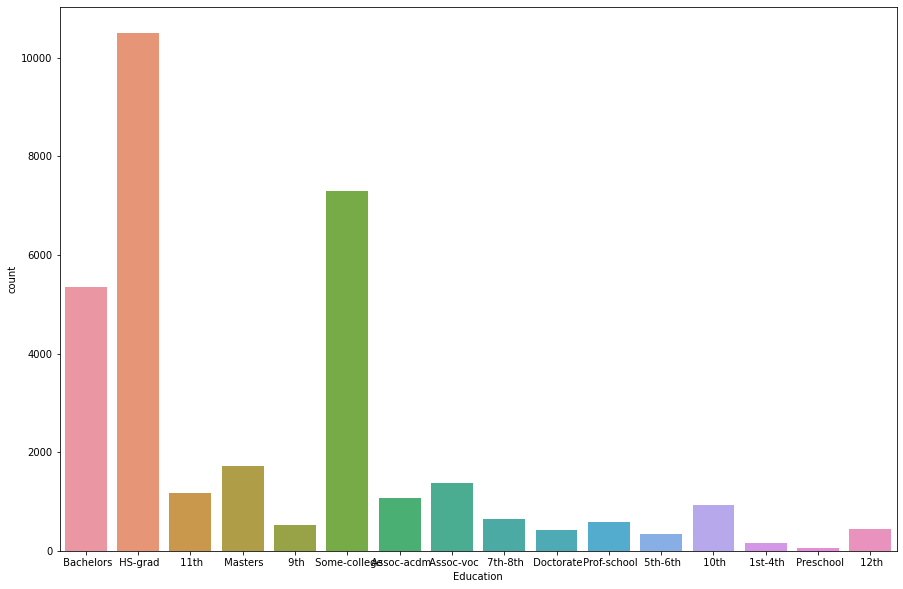

In [19]:
plt.figure(figsize = (15,10))
sns.countplot(adult_data[categorical_columns[1]])
plt.show()

In [20]:
adult_data['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [21]:
adult_data.groupby(['Education', 'Earning_potential']).size()

Education      Earning_potential
 10th           <=50K                871
                >50K                  62
 11th           <=50K               1115
                >50K                  60
 12th           <=50K                400
                >50K                  33
 1st-4th        <=50K                162
                >50K                   6
 5th-6th        <=50K                317
                >50K                  16
 7th-8th        <=50K                606
                >50K                  40
 9th            <=50K                487
                >50K                  27
 Assoc-acdm     <=50K                802
                >50K                 265
 Assoc-voc      <=50K               1021
                >50K                 361
 Bachelors      <=50K               3134
                >50K                2221
 Doctorate      <=50K                107
                >50K                 306
 HS-grad        <=50K               8826
                >50K    

In [22]:
adult_data.groupby(['Education', 'Workclass']).size()

Education      Workclass        
 10th           ?                    100
                Federal-gov            6
                Local-gov             31
                Never-worked           2
                Private              695
                Self-emp-inc          19
                Self-emp-not-inc      67
                State-gov             13
 11th           ?                    118
                Federal-gov            9
                Local-gov             36
                Never-worked           1
                Private              923
                Self-emp-inc          14
                Self-emp-not-inc      60
                State-gov             14
 12th           ?                     40
                Federal-gov            5
                Local-gov             19
                Private              333
                Self-emp-inc           7
                Self-emp-not-inc      19
                State-gov             10
 1st-4th        ?       

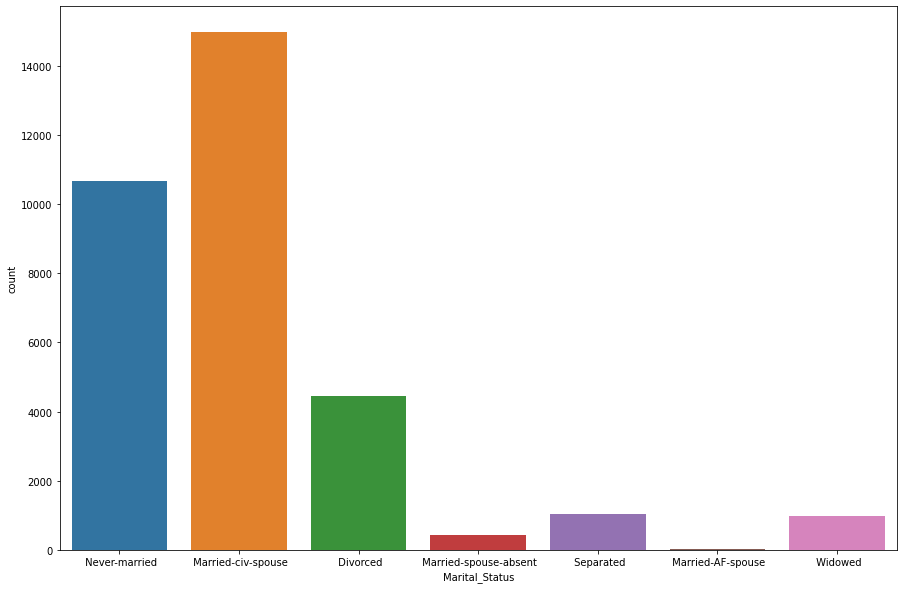

In [23]:
plt.figure(figsize = (15,10))
sns.countplot(adult_data[categorical_columns[2]])
plt.show()

In [24]:
adult_data['Marital_Status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_Status, dtype: int64

In [25]:
adult_data.groupby(['Marital_Status', 'Earning_potential']).size()

Marital_Status          Earning_potential
 Divorced                <=50K                3980
                         >50K                  463
 Married-AF-spouse       <=50K                  13
                         >50K                   10
 Married-civ-spouse      <=50K                8284
                         >50K                 6692
 Married-spouse-absent   <=50K                 384
                         >50K                   34
 Never-married           <=50K               10192
                         >50K                  491
 Separated               <=50K                 959
                         >50K                   66
 Widowed                 <=50K                 908
                         >50K                   85
dtype: int64

In [26]:
adult_data.groupby(['Marital_Status', 'Workclass']).size()

Marital_Status          Workclass        
 Divorced                ?                    184
                         Federal-gov          168
                         Local-gov            369
                         Never-worked           1
                         Private             3119
                         Self-emp-inc         100
                         Self-emp-not-inc     292
                         State-gov            210
 Married-AF-spouse       ?                      2
                         Federal-gov            3
                         Private               15
                         Self-emp-not-inc       2
                         State-gov              1
 Married-civ-spouse      ?                    636
                         Federal-gov          471
                         Local-gov           1023
                         Never-worked           1
                         Private             9732
                         Self-emp-inc         837
        

In [27]:
adult_data.groupby(['Marital_Status', 'Education']).size()

Marital_Status          Education    
 Divorced                10th             120
                         11th             130
                         12th              39
                         1st-4th           10
                         5th-6th           20
                         7th-8th           73
                         9th               64
                         Assoc-acdm       203
                         Assoc-voc        234
                         Bachelors        546
                         Doctorate         33
                         HS-grad         1613
                         Masters          233
                         Preschool          1
                         Prof-school       55
                         Some-college    1069
 Married-AF-spouse       Assoc-acdm         2
                         Assoc-voc          1
                         Bachelors          4
                         HS-grad           13
                         Some-college     

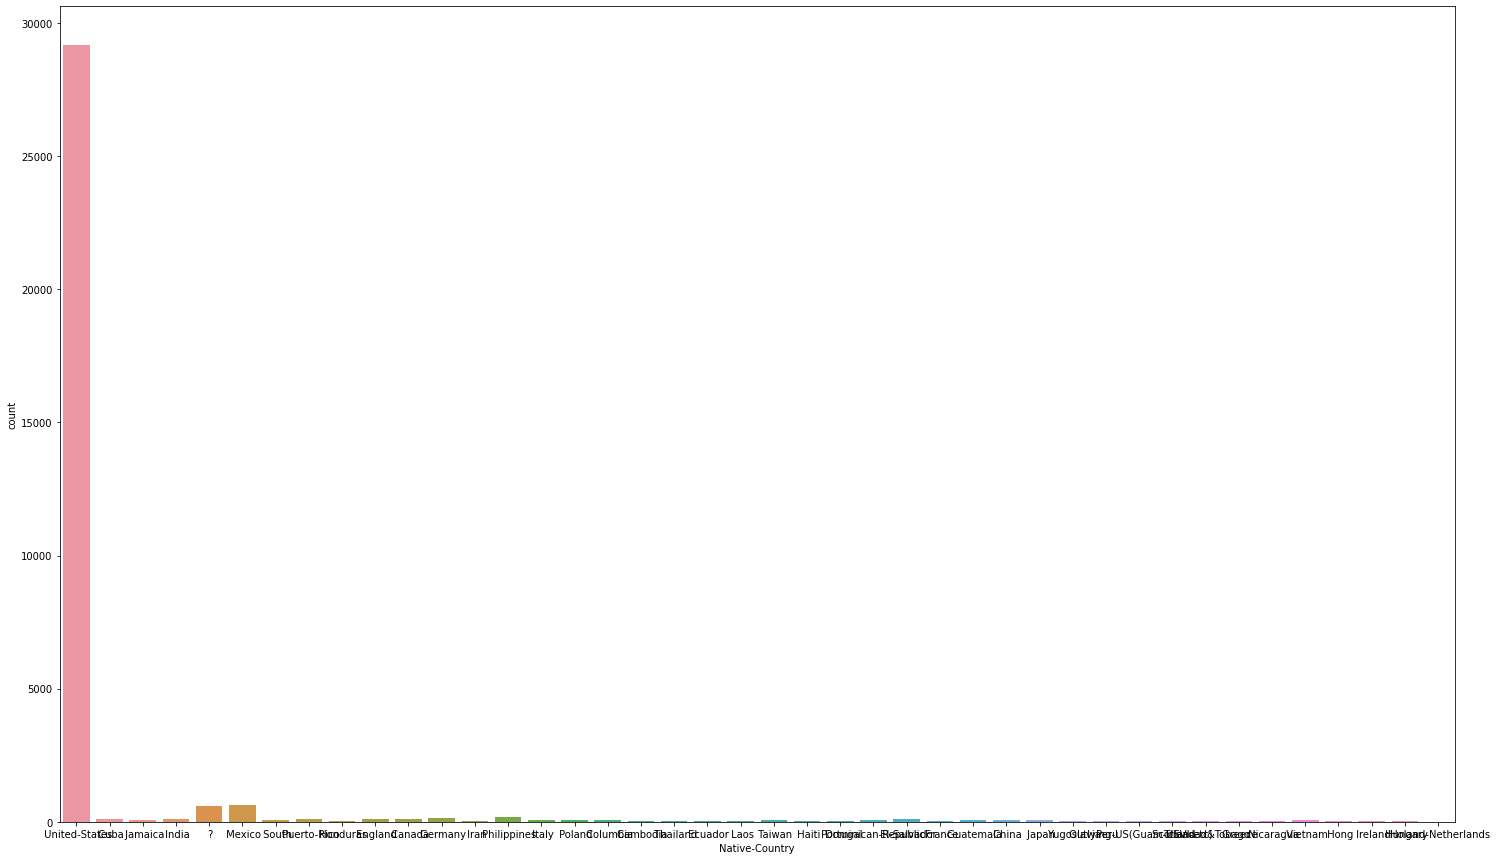

In [28]:
plt.figure(figsize=(25,15))
sns.countplot(adult_data['Native-Country'])
plt.show()

In [29]:
adult_data['Native-Country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [30]:
adult_data['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [31]:
adult_data.groupby(['Occupation', 'Education']).size()

Occupation          Education    
 ?                   10th             102
                     11th             119
                     12th              40
                     1st-4th           12
                     5th-6th           30
                     7th-8th           73
                     9th               51
                     Assoc-acdm        47
                     Assoc-voc         61
                     Bachelors        173
                     Doctorate         15
                     HS-grad          533
                     Masters           48
                     Preschool          5
                     Prof-school       18
                     Some-college     516
 Adm-clerical        10th              38
                     11th              67
                     12th              38
                     5th-6th            6
                     7th-8th           11
                     9th               14
                     Assoc-acdm       193


In [32]:
adult_data.groupby(['Occupation', 'Workclass']).size()

Occupation          Workclass        
 ?                   ?                   1836
                     Never-worked           7
 Adm-clerical        Federal-gov          317
                     Local-gov            283
                     Private             2833
                     Self-emp-inc          31
                     Self-emp-not-inc      50
                     State-gov            253
                     Without-pay            3
 Armed-Forces        Federal-gov            9
 Craft-repair        Federal-gov           64
                     Local-gov            146
                     Private             3195
                     Self-emp-inc         106
                     Self-emp-not-inc     531
                     State-gov             56
                     Without-pay            1
 Exec-managerial     Federal-gov          180
                     Local-gov            214
                     Private             2691
                     Self-emp-inc         

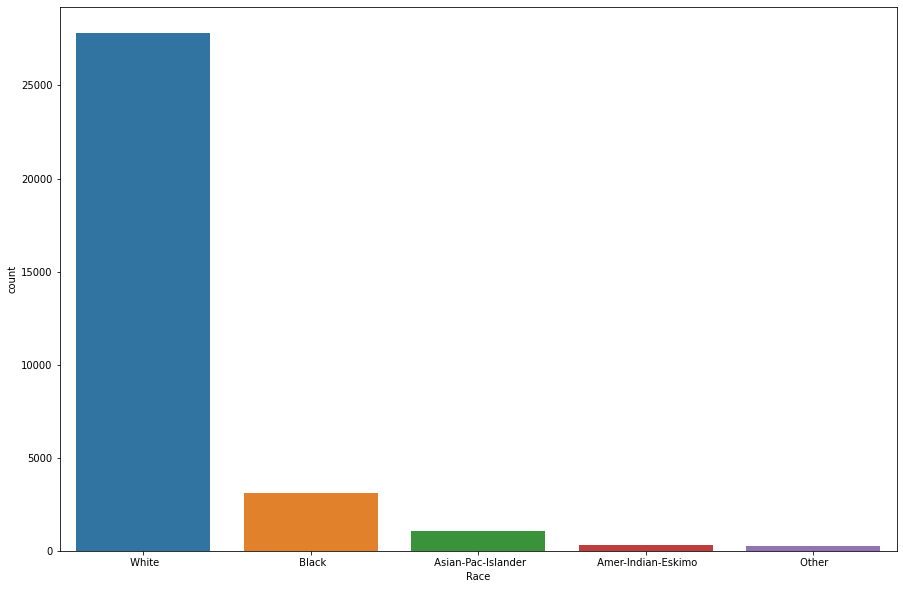

In [33]:
plt.figure(figsize=(15,10))
sns.countplot(adult_data['Race'])

In [34]:
adult_data.groupby(['Race', 'Earning_potential']).size()

Race                 Earning_potential
 Amer-Indian-Eskimo   <=50K                 275
                      >50K                   36
 Asian-Pac-Islander   <=50K                 763
                      >50K                  276
 Black                <=50K                2737
                      >50K                  387
 Other                <=50K                 246
                      >50K                   25
 White                <=50K               20699
                      >50K                 7117
dtype: int64

In [35]:
adult_data.groupby(['Race', 'Education']).size()

Race                 Education    
 Amer-Indian-Eskimo   10th              16
                      11th              14
                      12th               5
                      1st-4th            4
                      5th-6th            2
                      7th-8th            9
                      9th                5
                      Assoc-acdm         8
                      Assoc-voc         19
                      Bachelors         21
                      Doctorate          3
                      HS-grad          119
                      Masters            5
                      Prof-school        2
                      Some-college      79
 Asian-Pac-Islander   10th              13
                      11th              21
                      12th               9
                      1st-4th            5
                      5th-6th           18
                      7th-8th           11
                      9th                9
                   

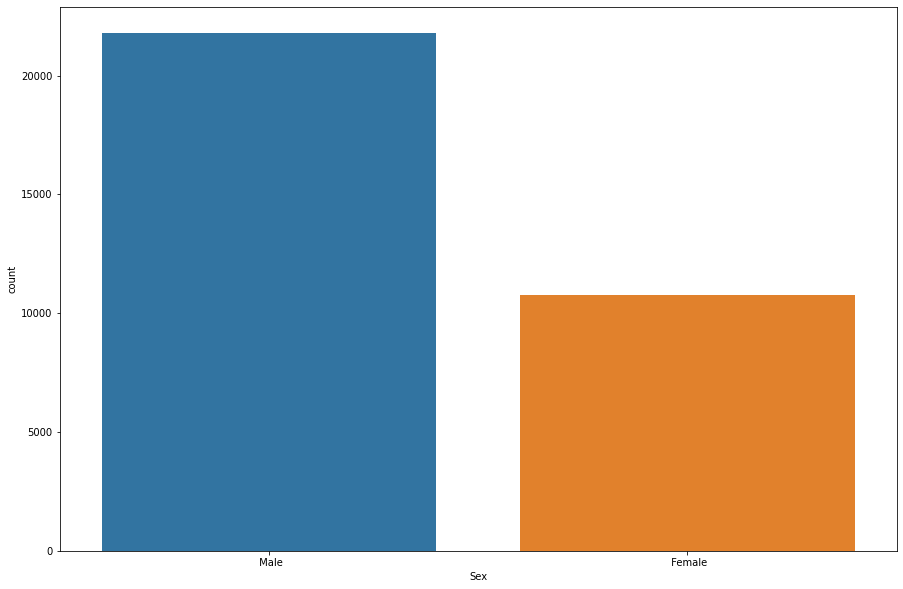

In [36]:
plt.figure(figsize=(15,10))
sns.countplot(adult_data['Sex'])

In [37]:
adult_data.groupby(['Sex', 'Earning_potential']).size()

Sex      Earning_potential
 Female   <=50K                9592
          >50K                 1179
 Male     <=50K               15128
          >50K                 6662
dtype: int64

In [38]:
adult_data.groupby(['Education', 'Sex']).size()

Education      Sex    
 10th           Female     295
                Male       638
 11th           Female     432
                Male       743
 12th           Female     144
                Male       289
 1st-4th        Female      46
                Male       122
 5th-6th        Female      84
                Male       249
 7th-8th        Female     160
                Male       486
 9th            Female     144
                Male       370
 Assoc-acdm     Female     421
                Male       646
 Assoc-voc      Female     500
                Male       882
 Bachelors      Female    1619
                Male      3736
 Doctorate      Female      86
                Male       327
 HS-grad        Female    3390
                Male      7111
 Masters        Female     536
                Male      1187
 Preschool      Female      16
                Male        35
 Prof-school    Female      92
                Male       484
 Some-college   Female    2806
                

In [39]:
adult_data.groupby(['Occupation', 'Sex']).size()

Occupation          Sex    
 ?                   Female     841
                     Male      1002
 Adm-clerical        Female    2537
                     Male      1233
 Armed-Forces        Male         9
 Craft-repair        Female     222
                     Male      3877
 Exec-managerial     Female    1159
                     Male      2907
 Farming-fishing     Female      65
                     Male       929
 Handlers-cleaners   Female     164
                     Male      1206
 Machine-op-inspct   Female     550
                     Male      1452
 Other-service       Female    1800
                     Male      1495
 Priv-house-serv     Female     141
                     Male         8
 Prof-specialty      Female    1515
                     Male      2625
 Protective-serv     Female      76
                     Male       573
 Sales               Female    1263
                     Male      2387
 Tech-support        Female     348
                     Male       580


In [40]:
numerical_columns

['Age',
 'fnlwgt',
 'Education-num',
 'Capital-gain',
 'Capital-loss',
 'hrs_per_week']

In [41]:
adult_data.var(axis=0)
adult_data.loc[:, numerical_columns].var()

Age              1.860614e+02
fnlwgt           1.114080e+10
Education-num    6.618890e+00
Capital-gain     5.454254e+07
Capital-loss     1.623769e+05
hrs_per_week     1.524590e+02
dtype: float64

In [42]:
var_in_float = adult_data.loc[:, numerical_columns].var()
for i in range(len(numerical_columns)):
    print('{} \t\t {}'.format(numerical_columns[i], round(float(var_in_float[i]), 3)))

Age 		 186.061
fnlwgt 		 11140797791.842
Education-num 		 6.619
Capital-gain 		 54542539.178
Capital-loss 		 162376.938
hrs_per_week 		 152.459


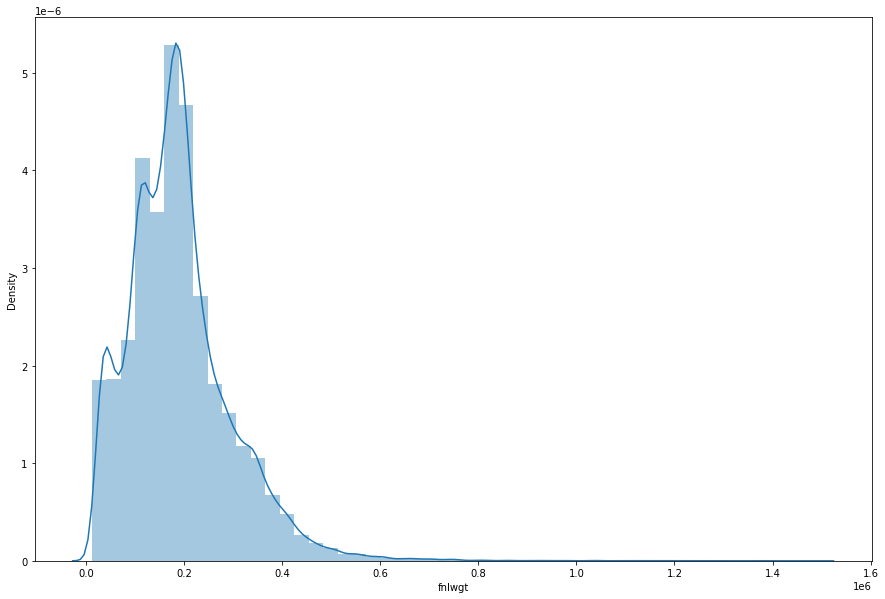

In [43]:
plt.figure(figsize=(15,10))
sns.distplot(adult_data['fnlwgt'])
plt.show()

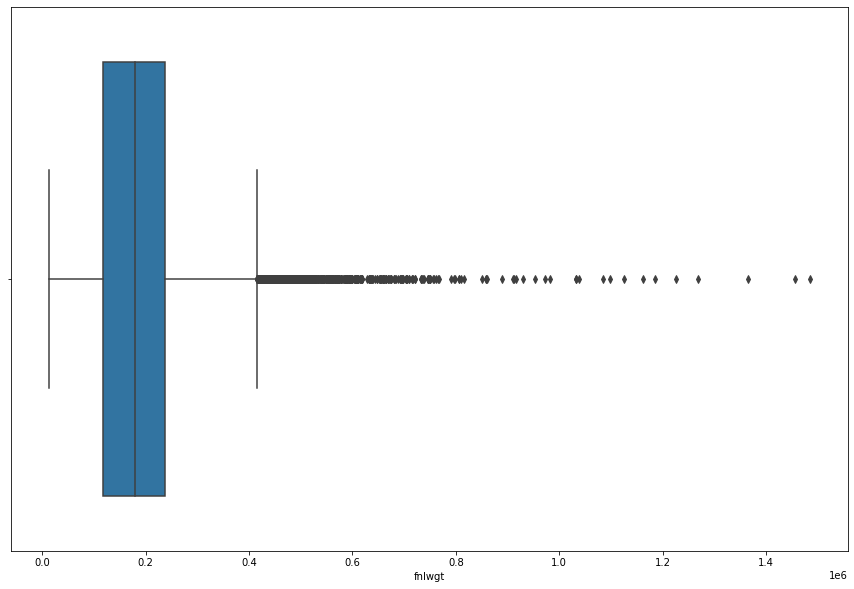

In [44]:
plt.figure(figsize=(15,10))
sns.boxplot(adult_data['fnlwgt'])
plt.show()

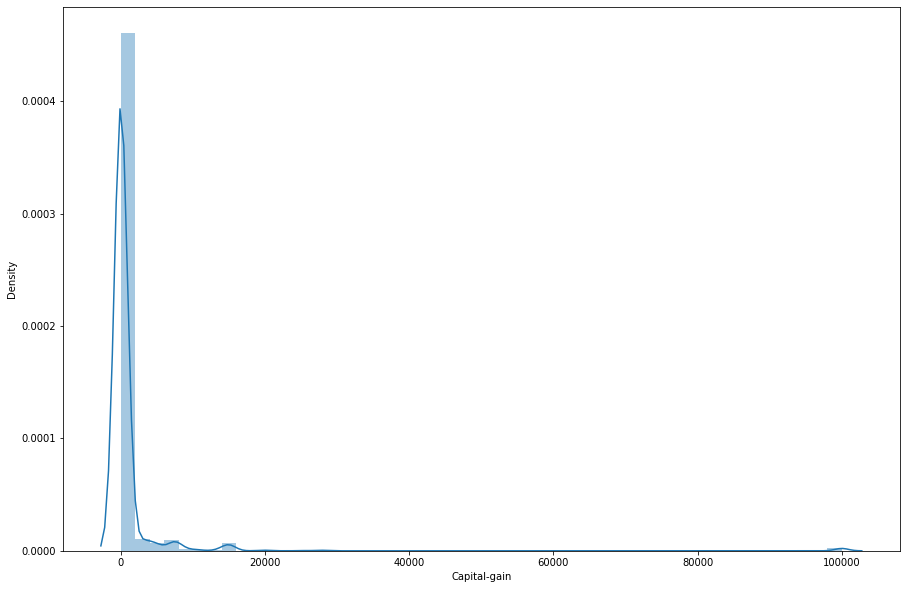

In [45]:
plt.figure(figsize=(15,10))
sns.distplot(adult_data['Capital-gain'])
plt.show()

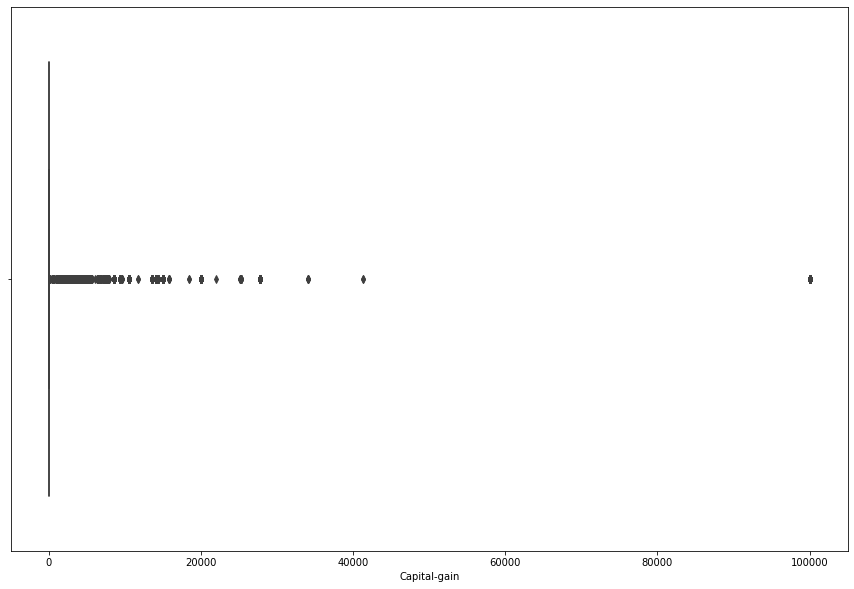

In [46]:
plt.figure(figsize=(15,10))
sns.boxplot(adult_data['Capital-gain'])
plt.show()


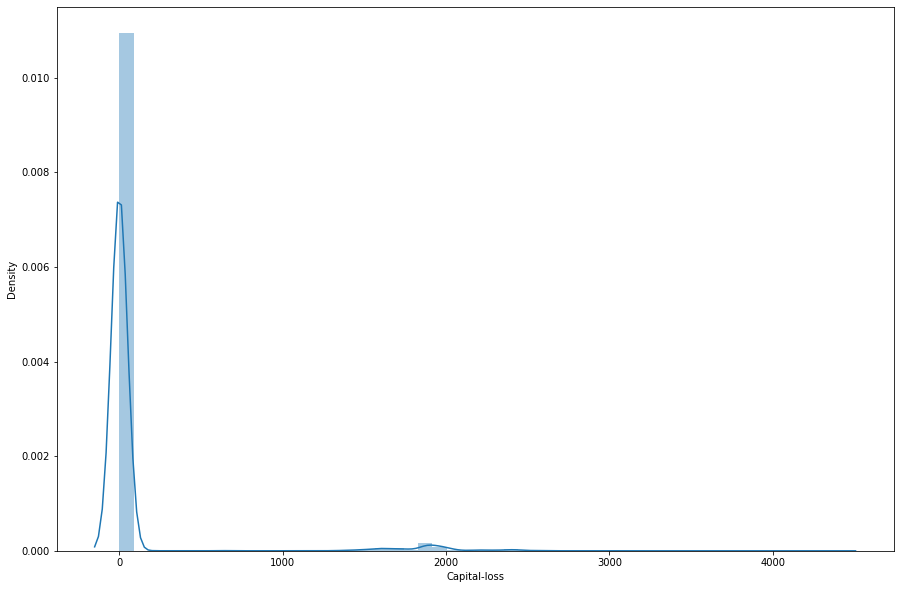

In [47]:
plt.figure(figsize=(15,10))
sns.distplot(adult_data['Capital-loss'])
plt.show()

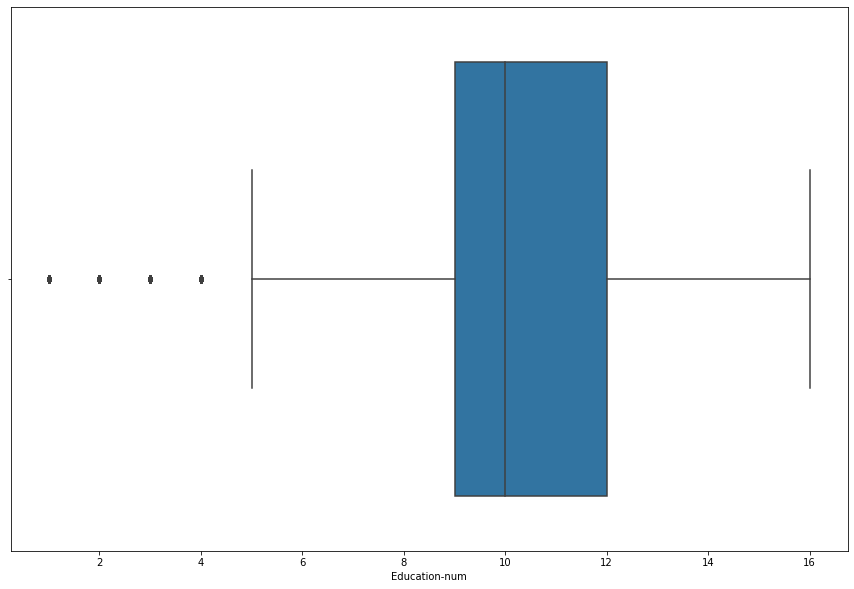

In [48]:
plt.figure(figsize=(15,10))
sns.boxplot(adult_data['Education-num'])
plt.show()

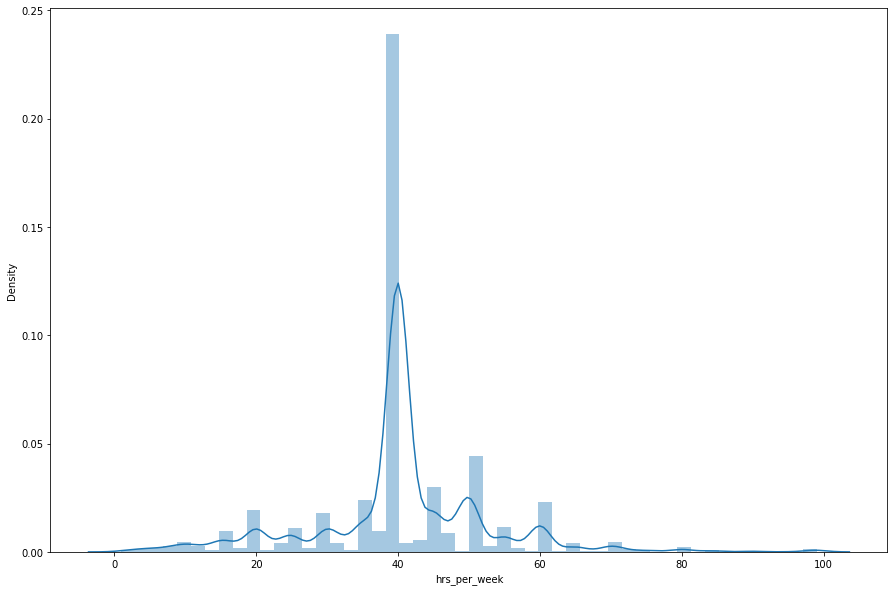

In [49]:
plt.figure(figsize=(15,10))
sns.distplot(adult_data['hrs_per_week'])
plt.show()

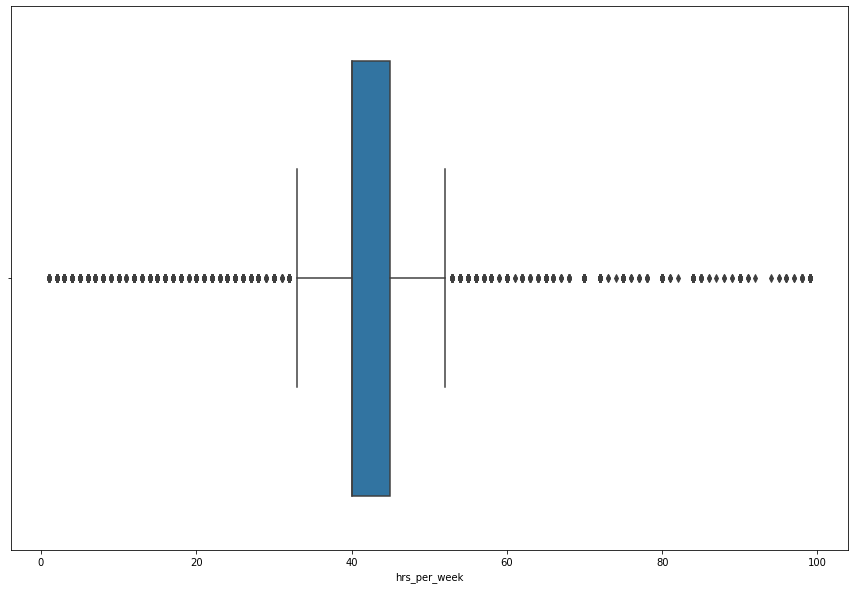

In [50]:
plt.figure(figsize=(15,10))
sns.boxplot(adult_data['hrs_per_week'])
plt.show()

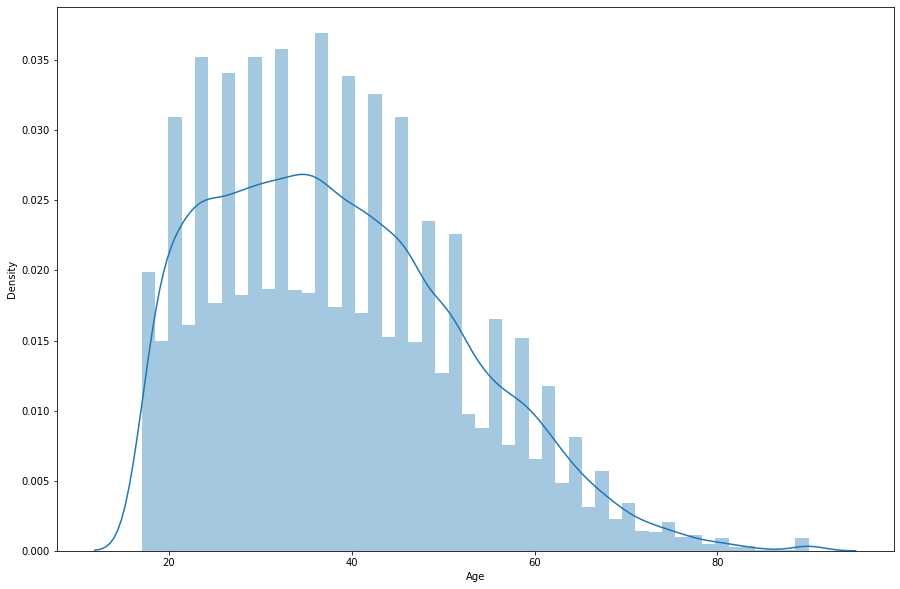

In [51]:
plt.figure(figsize=(15,10))
sns.distplot(adult_data['Age'])
plt.show()

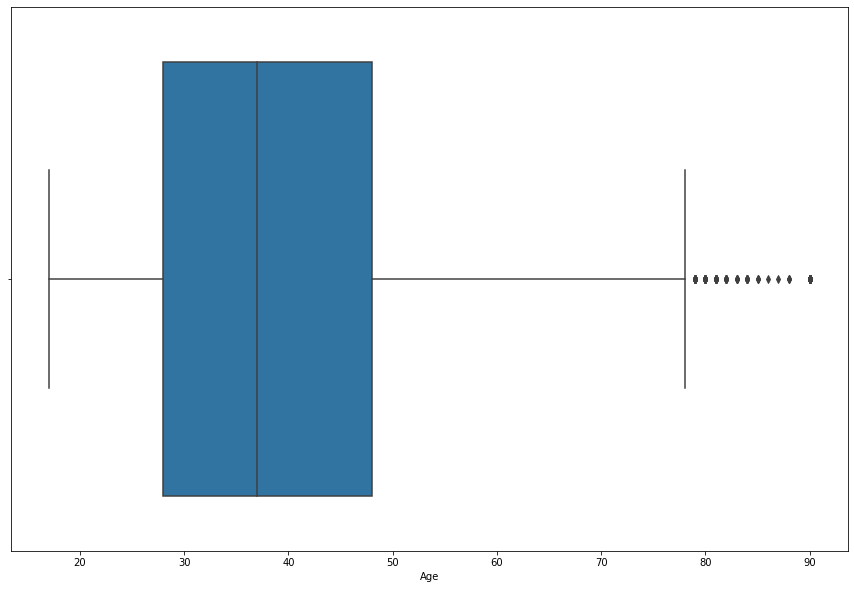

In [52]:
plt.figure(figsize=(15,10))
sns.boxplot(adult_data['Age'])
plt.show()

In [53]:
adult_data.corr()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,hrs_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
Education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
Capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
Capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hrs_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


Preprocessing
Null Value Treatment

In [54]:
null_columns = adult_data.columns[adult_data.isnull().any()]
adult_data[null_columns].isnull().sum()

Series([], dtype: float64)

In [56]:
for i in list(null_columns):
    adult_data[i].fillna(adult_data[i].mode().values[0],inplace=True)

In [57]:
print('{null_sum} \n\n {adult_data_info}'.format(null_sum=adult_data.isna().sum(), adult_data_info=adult_data.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                32561 non-null  int64 
 1   Workclass          32561 non-null  object
 2   fnlwgt             32561 non-null  int64 
 3   Education          32561 non-null  object
 4   Education-num      32561 non-null  int64 
 5   Marital_Status     32561 non-null  object
 6   Occupation         32561 non-null  object
 7   Relationship       32561 non-null  object
 8   Race               32561 non-null  object
 9   Sex                32561 non-null  object
 10  Capital-gain       32561 non-null  int64 
 11  Capital-loss       32561 non-null  int64 
 12  hrs_per_week       32561 non-null  int64 
 13  Native-Country     32561 non-null  object
 14  Earning_potential  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
Age                  0
Workclass          

Label Encoding

In [58]:
adult_data[categorical_columns].head()

,Workclass,Education,Marital_Status,Occupation,Relationship,Race,Sex,Native-Country,Earning_potential
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [59]:
label_encoder = LabelEncoder()
encoded_adult_data = adult_data
for i in categorical_columns:
    encoded_adult_data[i] = label_encoder.fit_transform(adult_data[i])
encoded_adult_data[categorical_columns].head()

,Workclass,Education,Marital_Status,Occupation,Relationship,Race,Sex,Native-Country,Earning_potential
0,7,9,4,1,1,4,1,39,0
1,6,9,2,4,0,4,1,39,0
2,4,11,0,6,1,4,1,39,0
3,4,1,2,6,0,2,1,39,0
4,4,9,2,10,5,2,0,5,0


Scaling the data

In [60]:
min_max_scaler = MinMaxScaler()

scaled_encoded_adult_data = pd.DataFrame()

column_values = encoded_adult_data.columns.values
column_values = column_values[:-1]
print(column_values[-1])

scaled_values = min_max_scaler.fit_transform(encoded_adult_data[column_values])

for i in range(len(column_values)):
    scaled_encoded_adult_data[column_values[i]] = scaled_values[:,i]
    
scaled_encoded_adult_data['Earning_potential'] = encoded_adult_data['Earning_potential']
scaled_encoded_adult_data.sample(10)

Native-Country


,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,Earning_potential
10470,0.465753,0.750,0.108419,1.000000,0.600000,0.333333,0.857143,0.0,1.0,1.0,0.00000,0.0,0.500000,0.95122,0
31535,0.465753,0.750,0.189803,0.333333,0.200000,0.333333,0.285714,0.0,1.0,1.0,0.00000,0.0,0.418367,0.95122,0
21490,0.027397,0.500,0.091274,1.000000,0.600000,0.666667,0.285714,0.6,0.5,1.0,0.00000,0.0,0.295918,0.95122,0
31155,0.191781,0.750,0.021881,1.000000,0.600000,0.333333,0.214286,0.0,1.0,1.0,0.00000,0.0,0.397959,0.95122,0
13049,0.136986,0.500,0.017871,0.133333,0.466667,0.666667,1.000000,0.2,1.0,1.0,0.00000,0.0,0.397959,0.95122,0
30187,0.219178,0.500,0.077381,0.733333,0.533333,0.833333,0.500000,0.8,0.5,0.0,0.00000,0.0,0.397959,0.95122,0
26303,0.273973,0.500,0.168132,0.533333,0.666667,0.333333,0.071429,0.0,1.0,1.0,0.03471,0.0,0.397959,0.95122,0
21848,0.027397,0.500,0.022081,1.000000,0.600000,0.666667,0.357143,0.2,1.0,0.0,0.00000,0.0,0.142857,0.95122,0
14309,0.356164,0.500,0.085191,0.733333,0.533333,0.333333,0.428571,0.0,1.0,1.0,0.00000,0.0,0.397959,0.95122,0
18392,0.027397,0.625,0.103485,1.000000,0.600000,0.666667,0.357143,0.6,1.0,1.0,0.00000,0.0,0.602041,0.95122,0


In [61]:
scaled_encoded_adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                32561 non-null  float64
 1   Workclass          32561 non-null  float64
 2   fnlwgt             32561 non-null  float64
 3   Education          32561 non-null  float64
 4   Education-num      32561 non-null  float64
 5   Marital_Status     32561 non-null  float64
 6   Occupation         32561 non-null  float64
 7   Relationship       32561 non-null  float64
 8   Race               32561 non-null  float64
 9   Sex                32561 non-null  float64
 10  Capital-gain       32561 non-null  float64
 11  Capital-loss       32561 non-null  float64
 12  hrs_per_week       32561 non-null  float64
 13  Native-Country     32561 non-null  float64
 14  Earning_potential  32561 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 3.7 MB


In [62]:
scaled_encoded_adult_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32561.0,0.295639,0.186855,0.0,0.150685,0.273973,0.424658,1.0
Workclass,32561.0,0.483612,0.181995,0.0,0.500000,0.500000,0.500000,1.0
fnlwgt,32561.0,0.120545,0.071685,0.0,0.071679,0.112788,0.152651,1.0
Education,32561.0,0.686547,0.258018,0.0,0.600000,0.733333,0.800000,1.0
Education-num,32561.0,0.605379,0.171515,0.0,0.533333,0.600000,0.733333,1.0
Marital_Status,32561.0,0.435306,0.251037,0.0,0.333333,0.333333,0.666667,1.0
Occupation,32561.0,0.469481,0.302061,0.0,0.214286,0.500000,0.714286,1.0
Relationship,32561.0,0.289272,0.321354,0.0,0.000000,0.200000,0.600000,1.0
Race,32561.0,0.916464,0.212201,0.0,1.000000,1.000000,1.000000,1.0
Sex,32561.0,0.669205,0.470506,0.0,0.000000,1.000000,1.000000,1.0


Outlier detection

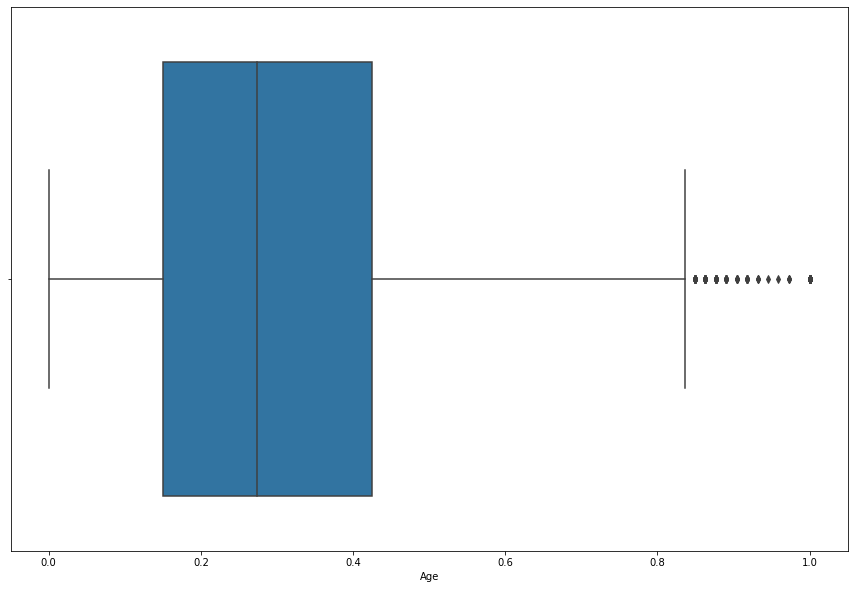

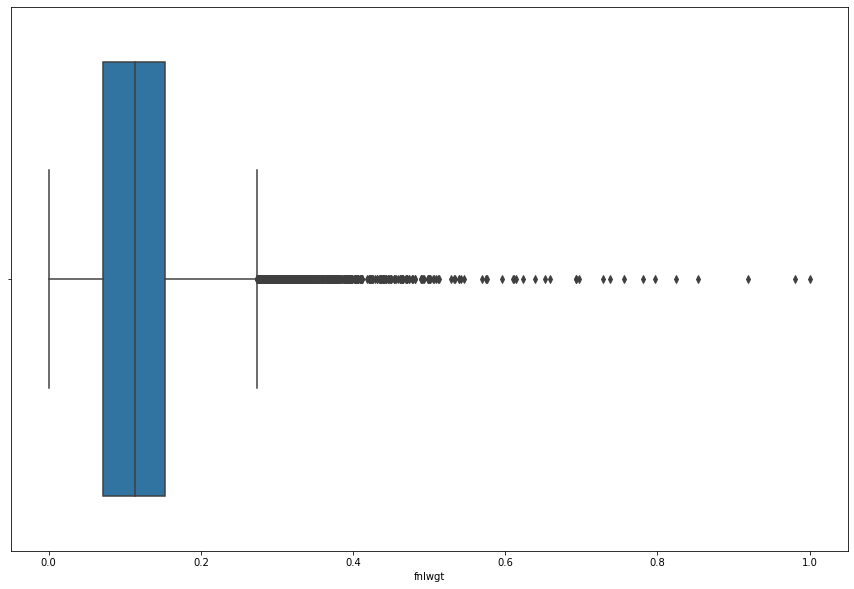

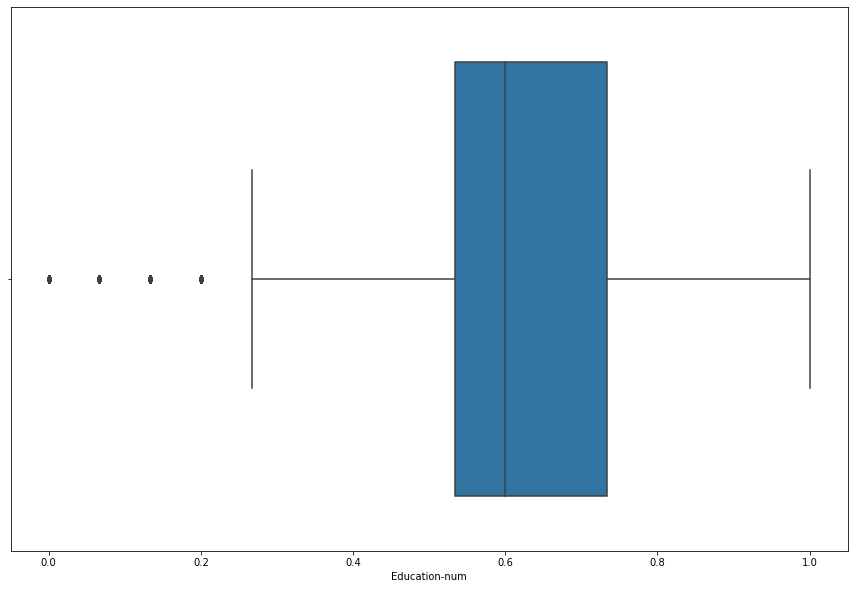

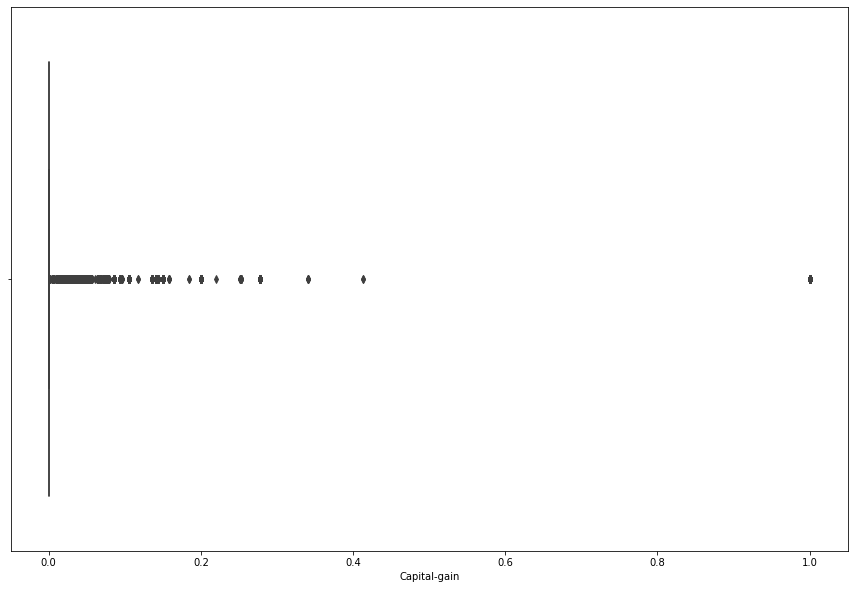

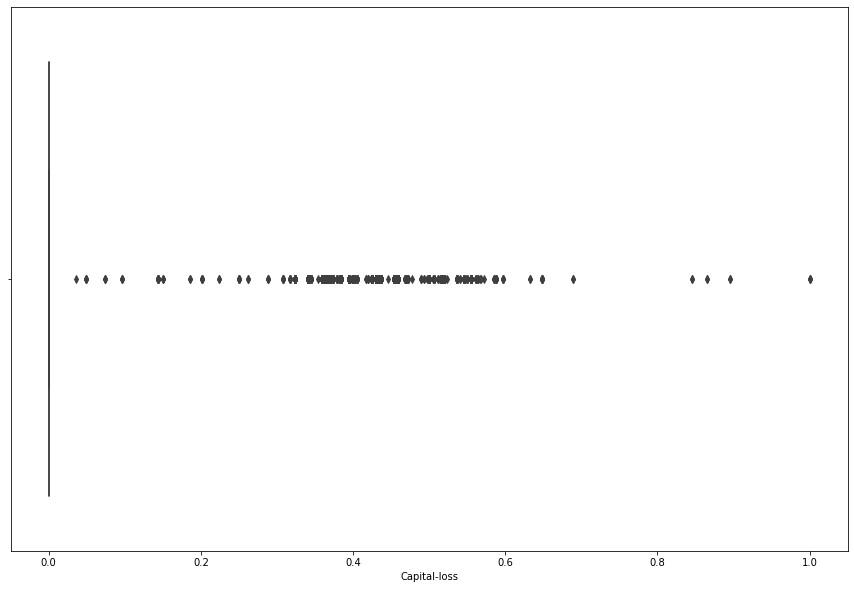

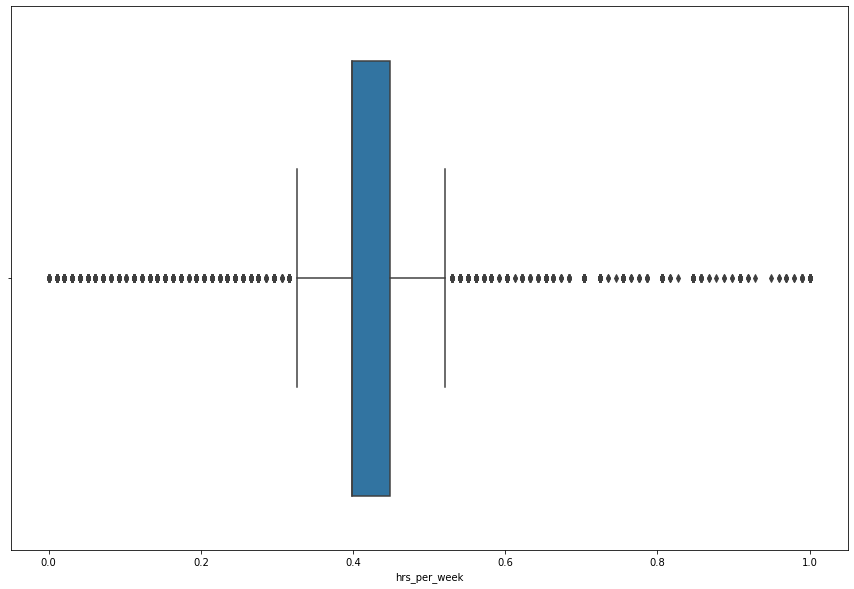

In [63]:
for i in range(len(numerical_columns)):
    plt.figure(figsize=(15,10))
    sns.boxplot(scaled_encoded_adult_data[numerical_columns[i]])
plt.show()

Outlier Treatment -> Replace with median

In [64]:
def outlier_detector(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn,[25,75])
    IQR = Q3 - Q1
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    return lower_bound,upper_bound

In [65]:
lowerbound, upperbound = outlier_detector(scaled_encoded_adult_data['Age'])
lowerbound, upperbound

(-0.2602739726027397, 0.8356164383561644)

In [66]:
scaled_encoded_adult_data[(scaled_encoded_adult_data.Age < lowerbound) | (scaled_encoded_adult_data.Age > upperbound)]

,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country,Earning_potential
74,0.849315,0.500,0.076377,1.000000,0.600000,0.333333,0.714286,0.4,1.00,1.0,0.000000,0.000000,0.193878,0.951220,0
222,1.000000,0.500,0.026799,0.733333,0.533333,0.666667,0.571429,0.2,0.50,1.0,0.000000,0.506428,0.397959,0.951220,0
430,0.863014,0.000,0.064844,0.733333,0.533333,1.000000,0.000000,0.2,1.00,1.0,0.000000,0.000000,0.234694,0.951220,0
918,0.876712,0.750,0.084064,0.733333,0.533333,0.333333,0.285714,0.0,1.00,1.0,0.000000,0.000000,0.295918,0.951220,0
1040,1.000000,0.500,0.084713,0.733333,0.533333,0.666667,0.571429,0.2,1.00,0.0,0.000000,0.000000,0.397959,0.951220,0
1168,0.972603,0.750,0.131760,0.933333,0.933333,0.333333,0.714286,0.0,1.00,1.0,0.000000,0.000000,0.397959,0.951220,0
1935,1.000000,0.500,0.142315,0.600000,0.800000,0.333333,0.285714,0.0,1.00,1.0,0.000000,0.000000,0.448980,0.951220,0
2303,1.000000,0.500,0.027235,1.000000,0.600000,0.666667,0.571429,0.2,0.25,1.0,0.000000,0.000000,0.346939,0.951220,0
2754,0.863014,0.750,0.116848,0.333333,0.200000,0.333333,0.357143,0.0,1.00,1.0,0.000000,0.000000,0.295918,0.951220,0
2891,1.000000,0.500,0.108441,1.000000,0.600000,0.833333,0.071429,0.6,1.00,0.0,0.000000,0.000000,0.397959,0.804878,0


In [67]:
new_columns = numerical_columns.copy()
new_columns.remove('Capital-gain') 
new_columns.remove('Capital-loss') 
new_columns

['Age', 'fnlwgt', 'Education-num', 'hrs_per_week']

In [68]:
treated_scaled_encoded_adult_data = scaled_encoded_adult_data.copy()
for i in new_columns:
    lowerbound, upperbound = outlier_detector(treated_scaled_encoded_adult_data[i])
    median = treated_scaled_encoded_adult_data[i].median()
    treated_scaled_encoded_adult_data[i] = treated_scaled_encoded_adult_data[i].replace(
        to_replace = treated_scaled_encoded_adult_data[(treated_scaled_encoded_adult_data[i] < lowerbound) | 
                                                       (treated_scaled_encoded_adult_data[i] > upperbound)][i],
                                      value = median)
    print('{}: number of outliers: {}'.format(i,treated_scaled_encoded_adult_data[
        (treated_scaled_encoded_adult_data[i] < lowerbound) |
        (treated_scaled_encoded_adult_data[i] > upperbound)][i]))

ValueError: ignored

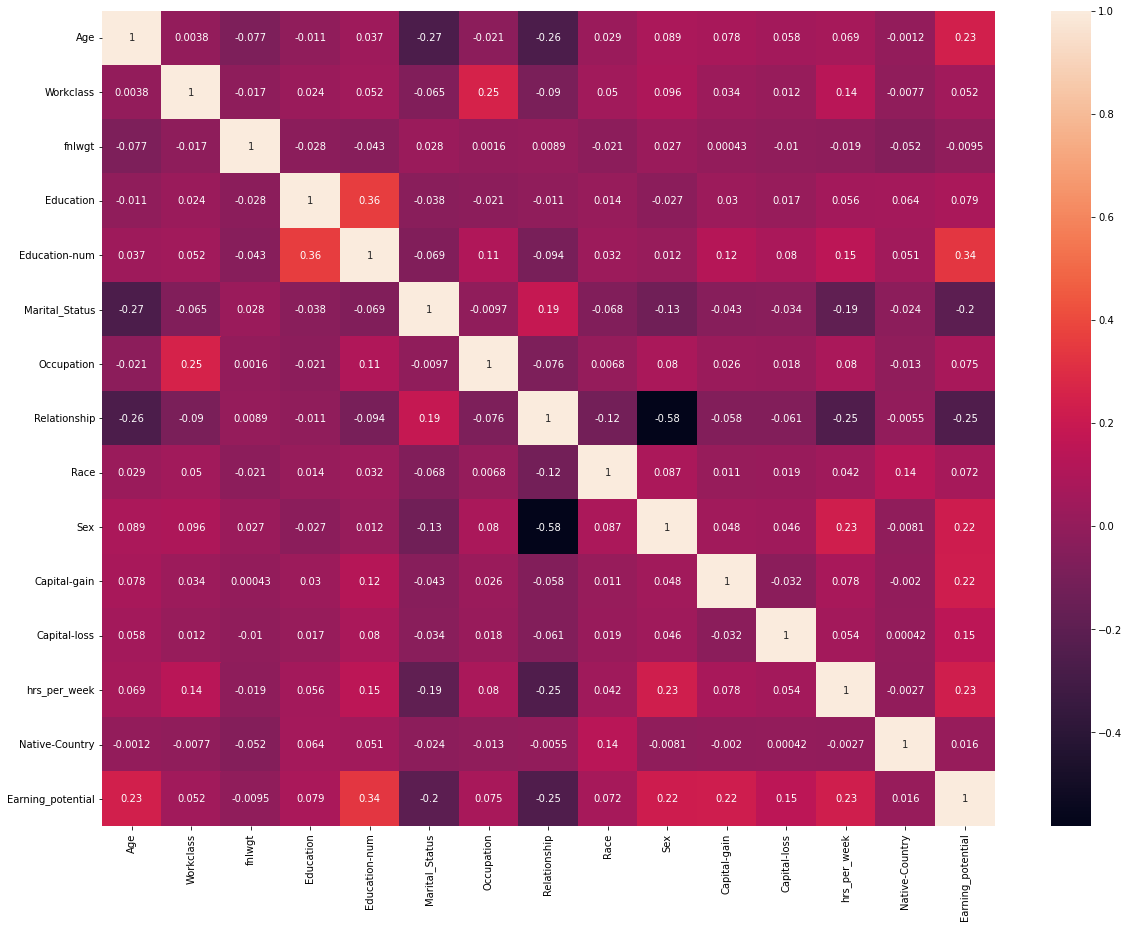

In [69]:
fig,ax=plt.subplots(figsize=(20,15))
ax=sns.heatmap(treated_scaled_encoded_adult_data.corr(),annot=True)

In [70]:
print(all_columns)

features = all_columns[:-1]
target = treated_scaled_encoded_adult_data['Earning_potential']
print(features)
print(treated_scaled_encoded_adult_data.shape)

['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'hrs_per_week', 'Native-Country', 'Earning_potential']
['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'hrs_per_week', 'Native-Country']
(32561, 15)


Copy of main dataframe to use for model training

In [71]:
feature_df = treated_scaled_encoded_adult_data[features]
print(target.head())
feature_df.head()

0    0
1    0
2    0
3    0
4    0
Name: Earning_potential, dtype: int64


,Age,Workclass,fnlwgt,Education,Education-num,Marital_Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hrs_per_week,Native-Country
0,0.301370,0.875,0.044302,0.600000,0.800000,0.666667,0.071429,0.2,1.0,1.0,0.02174,0.0,0.397959,0.951220
1,0.452055,0.750,0.048238,0.600000,0.800000,0.333333,0.285714,0.0,1.0,1.0,0.00000,0.0,0.122449,0.951220
2,0.287671,0.500,0.138113,0.733333,0.533333,0.000000,0.428571,0.2,1.0,1.0,0.00000,0.0,0.397959,0.951220
3,0.493151,0.500,0.151068,0.066667,0.400000,0.333333,0.428571,0.0,0.5,1.0,0.00000,0.0,0.397959,0.951220
4,0.150685,0.500,0.221488,0.600000,0.800000,0.333333,0.714286,1.0,0.5,0.0,0.00000,0.0,0.397959,0.121951


Train-validation-test splitting

In [72]:
x_train, x_test, y_train, y_test = train_test_split(feature_df, target, test_size=0.2)

print(x_train.shape,y_train.shape, x_test.shape, y_test.shape)

(26048, 14) (26048,) (6513, 14) (6513,)


Model Building

In [73]:
logistic_regressor = LogisticRegression()

logistic_regressor.fit(x_train, y_train)

LogisticRegression()

In [74]:
logistic_train_score = logistic_regressor.score(x_train, y_train)
logistic_test_score = logistic_regressor.score(x_test, y_test)
logistic_prediction = logistic_regressor.predict(x_test)

print('Train Score: {0}\nTest Score: {1}'.format(logistic_train_score, logistic_test_score))

Train Score: 0.823786855036855
Test Score: 0.8163672654690619


In [75]:
logistic_mse = mean_squared_error(y_test, logistic_prediction)
logistic_rmse = np.sqrt(logistic_mse)
print(logistic_mse, logistic_rmse)

0.18363273453093812 0.42852390193656426


KNN Classifier

In [76]:
error_rate = []
k_values = list(filter(lambda x: x%2==1, range(0,50)))
best_k = 0
for i in k_values:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
print(error_rate.index(np.min(error_rate)))

10


Text(0, 0.5, 'Error Rate')

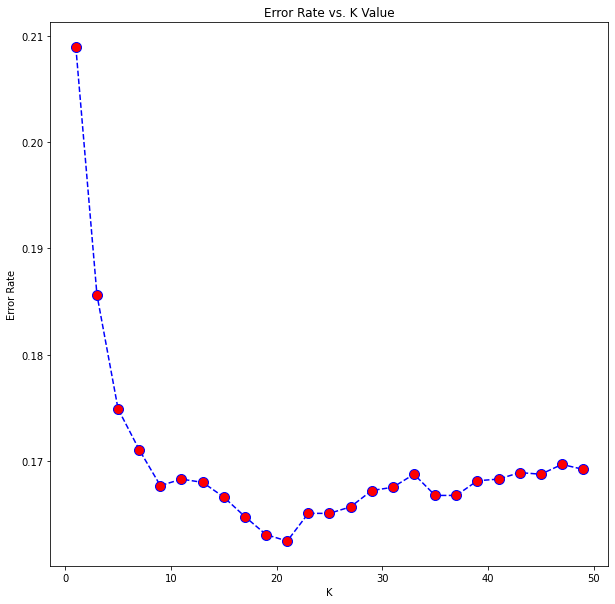

In [77]:
plt.figure(figsize=(10,10))
plt.plot(k_values,error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [78]:
knn_classifier = KNeighborsClassifier(n_neighbors=25)
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [79]:
knn_train_score = knn_classifier.score(x_train, y_train)
knn_test_score = knn_classifier.score(x_test, y_test)

print('Train score: {}\nTest score: {}'.format(knn_train_score, knn_test_score))

Train score: 0.8448249385749386
Test score: 0.8349454936281283


In [80]:
knn_prediction = knn_classifier.predict(x_test)

knn_classifier_mse = mean_squared_error(y_test, knn_prediction)
knn_classifier_rmse = np.sqrt(knn_classifier_mse)

print('MSE: {}\nRMSE: {}'.format(knn_classifier_mse, knn_classifier_rmse))

MSE: 0.16505450637187163
RMSE: 0.4062690073976498


Support Vector Classifier

In [81]:
svc = SVC(kernel='rbf')
svc.fit(x_train, y_train)

SVC()

In [82]:
svc_train_score = svc.score(x_train, y_train)
svc_test_score = svc.score(x_test, y_test)

print('Train score: {}\nTest score: {}'.format(svc_train_score, svc_test_score))

Train score: 0.8492014742014742
Test score: 0.8413941348073085


In [83]:
svc_prediction = svc.predict(x_test)

svc_mse = mean_squared_error(y_test, svc_prediction)
svc_rmse = np.sqrt(svc_mse)

print('MSE: {}\nRMSE: {}'.format(svc_mse, svc_rmse))

MSE: 0.15860586519269154
RMSE: 0.3982535187448964


Decision Tree Classifier

In [84]:
dtree_classifier = DecisionTreeClassifier(min_impurity_decrease = 0.05)
dtree_classifier.fit(x_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.05)

In [85]:
dtree_train_score = dtree_classifier.score(x_train, y_train)
dtree_test_score = dtree_classifier.score(x_test, y_test)

print('Train score: {}\nTest score: {}'.format(dtree_train_score, dtree_test_score))

Train score: 0.7614788083538083
Test score: 0.7500383847689237


In [86]:
dtree_prediction = dtree_classifier.predict(x_test)

dtree_mse = mean_squared_error(y_test, svc_prediction)
dtree_rmse = np.sqrt(dtree_mse)

print('MSE: {}\nRMSE: {}'.format(dtree_mse, dtree_rmse))

MSE: 0.15860586519269154
RMSE: 0.3982535187448964


Ensembling with Boosting:- AdaBoostClassifier

In [87]:
adaboost_classifier = AdaBoostClassifier(n_estimators=3)
adaboost_classifier.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=3)

In [88]:
adaboost_train_score = adaboost_classifier.score(x_train,y_train)
adaboost_test_score = adaboost_classifier.score(x_test,y_test)
print('Train score: {}\nTest score: {}'.format(adaboost_train_score, adaboost_test_score))

Train score: 0.8404100122850123
Test score: 0.8307999385843697


In [89]:
adaboost_prediction = adaboost_classifier.predict(x_test)

adaboost_mse = mean_squared_error(y_test, adaboost_prediction)
adaboost_rmse = np.sqrt(adaboost_mse)

print('MSE: {}\nRMSE: {}'.format(adaboost_mse, adaboost_rmse))

MSE: 0.16920006141563027
RMSE: 0.4113393506773091


Ensembling with Bagging:- RandomForest Classifier

In [90]:
random_forest_classifier = RandomForestClassifier(n_estimators=20, min_samples_split=15, min_impurity_decrease=0.05)
random_forest_classifier.fit(x_train, y_train)

RandomForestClassifier(min_impurity_decrease=0.05, min_samples_split=15,
                       n_estimators=20)

In [91]:
random_forest_train_score = random_forest_classifier.score(x_train,y_train)
random_forest_test_score = random_forest_classifier.score(x_test,y_test)
print('Train score: {}\nTest score: {}'.format(random_forest_train_score, random_forest_test_score))

Train score: 0.7614788083538083
Test score: 0.7500383847689237


In [92]:
random_forest_prediction = random_forest_classifier.predict(x_test)

random_forest_mse = mean_squared_error(y_test, random_forest_prediction)
random_forest_rmse = np.sqrt(random_forest_mse)

print('MSE: {}\nRMSE: {}'.format(random_forest_mse, random_forest_rmse))

MSE: 0.2499616152310763
RMSE: 0.4999616137575727
